# MLP(CIFAR-10)

# This Notebook is for Question_2 of <a href="https://scholar.google.com/citations?user=m7xdmMgAAAAJ&hl=en">Prof.kalhor</a>
 Deep learning course Tehran university

In [20]:
import numpy as np
import sklearn
import keras
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings ;
from keras.datasets import cifar10

# Normalizing Data

In [22]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
# loading data
cifar10 = tf.keras.datasets.cifar10
(X_train, Y_train),(X_test, Y_test) = cifar10.load_data()
# normalizing data
x_train = np.float32(X_train)/255
x_test = np.float32(X_test)/255
x_train = np.mean(x_train,axis=3)
x_test= np.mean(x_test,axis=3)
x_train = x_train.reshape(-1,32*32)
x_test = x_test.reshape(-1,32*32)
# one-hot label
y_train = keras.utils.to_categorical(Y_train,10)
y_test = keras.utils.to_categorical(Y_test,10)

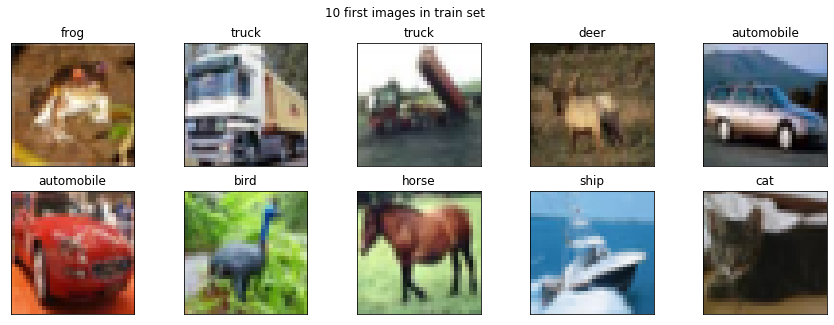

In [23]:
import matplotlib.pyplot as plt
label = np.array(['airplane','automobile','bird','cat','deer',
           'dog','frog','horse','ship','truck'])
plt.figure(figsize=(15,5))
plt.suptitle('10 first images in train set')
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(list(label[Y_train[i]])[0])
    plt.yticks([])
    plt.xticks([])

# RGB & Grayscale

Text(0.5, 1.0, 'grayscale image')

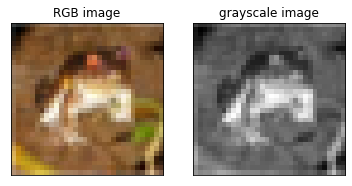

In [24]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(X_train[0])
plt.yticks([])
plt.xticks([])
plt.title('RGB image')
plt.subplot(1,2,2)
plt.imshow(x_train[0].reshape(32,32),'gray')
plt.yticks([])
plt.xticks([])
plt.title('grayscale image')

In [25]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(1000,activation='sigmoid',kernel_initializer='normal',
                input_dim=32*32))
model.add(Dropout(.2))
model.add(Dense(500,activation='sigmoid',kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax',kernel_initializer='normal'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')
history = model.fit(x_train,y_train,epochs=40,
                    validation_split=0.3,batch_size=256)

Epoch 1/40
137/137 [==============================] - 4s 30ms/step - loss: 2.1452 - accuracy: 0.2175 - val_loss: 2.0400 - val_accuracy: 0.2778
Epoch 2/40
137/137 [==============================] - 4s 29ms/step - loss: 2.0064 - accuracy: 0.2816 - val_loss: 1.9588 - val_accuracy: 0.3089
Epoch 3/40
137/137 [==============================] - 4s 28ms/step - loss: 1.9434 - accuracy: 0.3048 - val_loss: 1.9084 - val_accuracy: 0.3131
Epoch 4/40
137/137 [==============================] - 4s 27ms/step - loss: 1.8891 - accuracy: 0.3240 - val_loss: 1.8590 - val_accuracy: 0.3347
Epoch 5/40
137/137 [==============================] - 4s 27ms/step - loss: 1.8476 - accuracy: 0.3395 - val_loss: 1.8327 - val_accuracy: 0.3460
Epoch 6/40
137/137 [==============================] - 4s 28ms/step - loss: 1.8190 - accuracy: 0.3522 - val_loss: 1.8251 - val_accuracy: 0.3545
Epoch 7/40
137/137 [==============================] - 4s 30ms/step - loss: 1.7887 - accuracy: 0.3639 - val_loss: 1.7894 - val_accuracy: 0.3625

# Evaluate model

313/313 [==============================] - 1s 3ms/step - loss: 1.5365 - accuracy: 0.4546


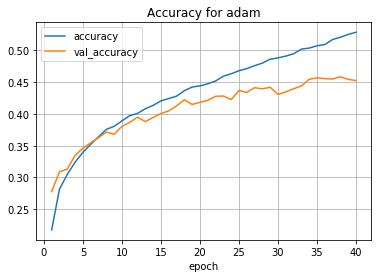

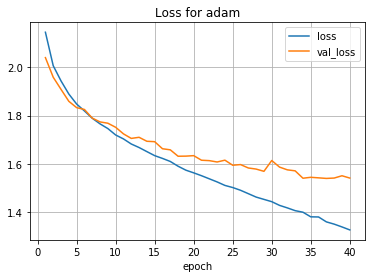

In [26]:
import matplotlib.pyplot as plt
model.evaluate(x_test,y_test)
ep = 40;
plt.plot(np.arange(1,ep+1),history.history['accuracy'],label='accuracy')
plt.plot(np.arange(1,ep+1),history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy for adam')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.figure()
plt.plot(np.arange(1,ep+1),history.history['loss'],label='loss')
plt.plot(np.arange(1,ep+1),history.history['val_loss'],label='val_loss')
plt.title('Loss for adam')
plt.xlabel('epoch')
plt.legend()
plt.grid()

Text(114.0, 0.5, 'True')

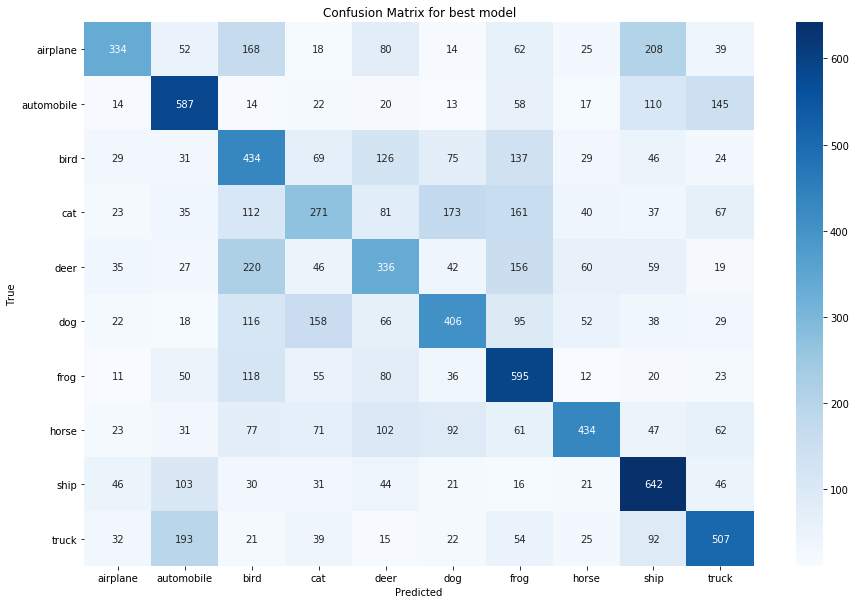

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
label = np.array(['airplane','automobile','bird','cat','deer',
           'dog','frog','horse','ship','truck'])
y_pred = np.argmax(model.predict(x_test),axis=1)
y_target = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_target, y_pred)
plt.figure(figsize=(15,10))
sn.heatmap(cm,cmap='Blues',annot=True,fmt="d",
           xticklabels=label,yticklabels=label)
plt.title('Confusion Matrix for best model')
plt.xlabel('Predicted')
plt.ylabel('True')